In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

os.makedirs('./final_figs', exist_ok=True)

In [5]:
def get_outlier_mask(vector, percentile=100-1):
    threshold = np.percentile(vector, percentile)
    return vector > threshold

def plot_vector(
    vector,
    outlier_mask,
    xlabel,
    ylabel,
    title,
    save_path,
    dot_color = 'red',
    normal_color = 'blue',
    outlier_color = 'green',
    line_alpha = 0.4,
    yrange = None,
    legend = False,
):
    channels = np.arange(vector.shape[0])

    fig, ax = plt.subplots(figsize=(5, 5))

    # plot dots
    ax.plot(channels, vector, 'o', color = dot_color, markersize=1)

    # plot line
    for i in range(len(channels)):
        is_outlier = outlier_mask[i]
        color = outlier_color if is_outlier else normal_color
        alpha = line_alpha if not is_outlier else 1
        ax.plot([channels[i], channels[i]], [0, vector[i]], '-', linewidth=0.5, alpha=alpha, color=color)

    # set y range to be [0, 1]
    if yrange is not None:
        ax.set_ylim(yrange)

    # plot non-outlier max horizontal line
    # non_outlier_max = torch.max(vector[~outlier_mask]).item()
    # ax.plot([0, len(channels)], [non_outlier_max, non_outlier_max], '--', linewidth=1, color='red')

    # draw legends
    outlier_lines = mlines.Line2D([], [], color=outlier_color, label='Salient Channels')
    normal_lines = mlines.Line2D([], [], color=normal_color, label='Normal Channels')
    normal_max_line = mlines.Line2D([], [], color='red', linestyle='--', label="Normal Channels' Max")
    if legend:
        ax.legend(handles=[outlier_lines, normal_lines, normal_max_line], loc='upper left')

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    # ax.set_title(title)

    plt.savefig(save_path)

In [14]:
outlier_stats = torch.load('outlier_stats/3_sigma/llama-7b-meta_outlier.pt')
# outlier_stats = torch.load('outlier_stats/3_sigma/opt-6.7b_outlier.pt')

for k, v in outlier_stats.items():
    print(k)

LAYER_ID = 28
# llama
layers = {
    f"model.layers.{LAYER_ID}.input_layernorm": 'Attention Input Projection Layer',
    f"model.layers.{LAYER_ID}.post_attention_layernorm": 'FFN Expansion Layer',
    f"model.layers.{LAYER_ID}.self_attn.o_proj": 'Attention Output Projection Layer',
    f"model.layers.{LAYER_ID}.mlp.down_proj": 'FFN Contraction Layer',
}

fig_titles = {
    f"model.layers.{LAYER_ID}.input_layernorm": 'attn_iproj',
    f"model.layers.{LAYER_ID}.post_attention_layernorm": 'mlp_fc1',
    f"model.layers.{LAYER_ID}.self_attn.o_proj": 'attn_oproj',
    f"model.layers.{LAYER_ID}.mlp.down_proj": 'mlp_fc2',
}

# layers = [
#     f"model.layers.{i}.mlp.down_proj" for i in range(32)
# ]
# opt
# layers = [
#     f"model.decoder.layers.{LAYER_ID}.self_attn_layer_norm",
#     f"model.decoder.layers.{LAYER_ID}.self_attn.out_proj",
#     f"model.decoder.layers.{LAYER_ID}.final_layer_norm",
#     f"model.decoder.layers.{LAYER_ID}.fc2",
# ]

model.layers.0.input_layernorm
model.layers.0.self_attn.q_proj
model.layers.0.self_attn.k_proj
model.layers.0.self_attn.v_proj
model.layers.0.self_attn.qkt_matmul
model.layers.0.self_attn.pv_matmul
model.layers.0.self_attn.o_proj
model.layers.0.post_attention_layernorm
model.layers.0.mlp.gate_proj
model.layers.0.mlp.up_proj
model.layers.0.mlp.down_proj
model.layers.1.input_layernorm
model.layers.1.self_attn.q_proj
model.layers.1.self_attn.k_proj
model.layers.1.self_attn.v_proj
model.layers.1.self_attn.qkt_matmul
model.layers.1.self_attn.pv_matmul
model.layers.1.self_attn.o_proj
model.layers.1.post_attention_layernorm
model.layers.1.mlp.gate_proj
model.layers.1.mlp.up_proj
model.layers.1.mlp.down_proj
model.layers.2.input_layernorm
model.layers.2.self_attn.q_proj
model.layers.2.self_attn.k_proj
model.layers.2.self_attn.v_proj
model.layers.2.self_attn.qkt_matmul
model.layers.2.self_attn.pv_matmul
model.layers.2.self_attn.o_proj
model.layers.2.post_attention_layernorm
model.layers.2.mlp.g

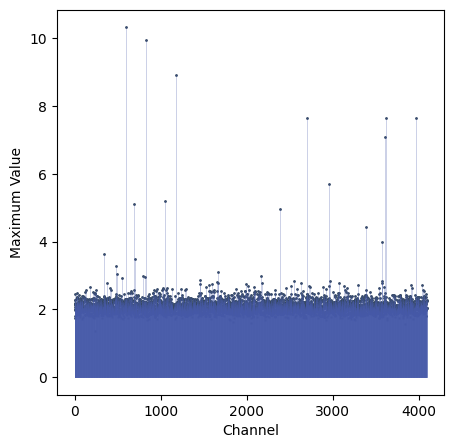

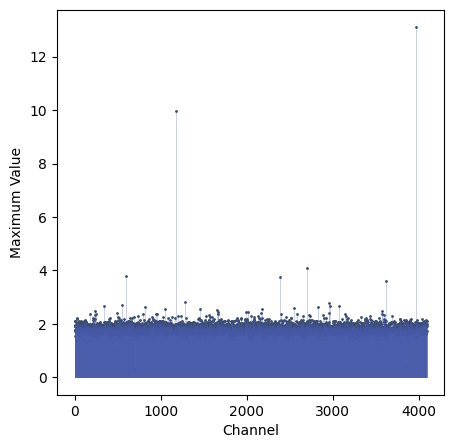

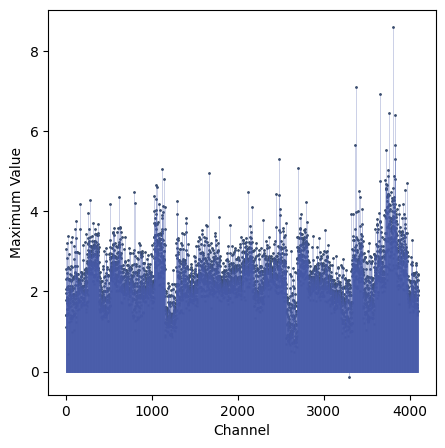

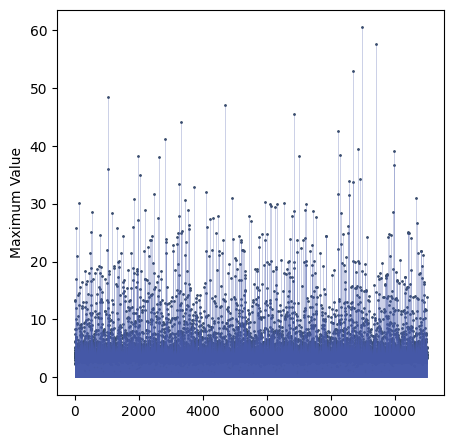

In [17]:
for layer_name in layers:
    category = 'output' if 'norm' in layer_name else 'input'
    outlier_magnitude = outlier_stats[layer_name][category]['channel_max']
    outlier_mask = torch.zeros_like(outlier_magnitude).bool()
    # outlier_mask = get_outlier_mask(outlier_stats[layer_name][category]['channel_max'])

    plot_vector(
        outlier_magnitude,
        outlier_mask,
        'Channel',
        'Maximum Value',
        layers[layer_name],
        # f'final_figs/{layer_name}_outlier_magnitude.pdf',
        save_path=f"final_figs/{fig_titles[layer_name]}.pdf",
        dot_color = '#354866',
        # normal_color = '#B2D6E6',
        # outlier_color = '#485BAA',
        outlier_color = '#B2D6E6',
        normal_color = '#485BAA',
        line_alpha=0.4,
        yrange=None,
        legend=False
        # legend=(layers[layer_name] == 'FFN Contraction Layer')
    )

In [33]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('results/outlier_dse.csv')
print(df)

             model                experiment  wikitext2
0    llama-7b-meta                 fc1_W16A4       8.37
1    llama-7b-meta     fc1_W16A4O12_ol1p1024       5.89
2    llama-7b-meta      fc1_W16A4O12_ol1p128       5.79
3    llama-7b-meta       fc1_W16A4O12_ol1p16       5.78
4    llama-7b-meta     fc1_W16A4O12_ol1p2048       6.00
..             ...                       ...        ...
243       opt-6.7b    qkvproj_W16A4O8_ol1p32      12.54
244       opt-6.7b  qkvproj_W16A4O8_ol1p4096     345.31
245       opt-6.7b   qkvproj_W16A4O8_ol1p512      13.14
246       opt-6.7b    qkvproj_W16A4O8_ol1p64      12.55
247       opt-6.7b     qkvproj_W16A4O8_ol1p8      12.52

[248 rows x 3 columns]


In [34]:
def parse_experiment_name(name):
    pattern = r'ol1p(\d+)'
    match = re.search(pattern, name)
    if match:
        outlier_ratio = int(match.group(1))
    else:
        outlier_ratio = 0

    pattern = r'W16A4O(\d+)'
    match = re.search(pattern, name)
    if match:
        outlier_precision = int(match.group(1))
    else:
        outlier_precision = 4

    layer_type = name.split('_')[0]
    
    return outlier_ratio, outlier_precision, layer_type

# Add two new columns to df: outlier ratio and outlier precision
df['outlier_ratio'] = 0
df['outlier_precision'] = 0
df['layer_type'] = 0

# for every row in df, parse the experiment name and update the two new columns
for i in range(len(df)):
    outlier_ratio, outlier_precision, layer_type = parse_experiment_name(df['experiment'][i])
    df['outlier_ratio'][i] = outlier_ratio
    df['outlier_precision'][i] = outlier_precision
    df['layer_type'][i] = layer_type

/tmp/ipykernel_48195/1653741344.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outlier_ratio'][i] = outlier_ratio
/tmp/ipykernel_48195/1653741344.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outlier_precision'][i] = outlier_precision
/tmp/ipykernel_48195/1653741344.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['layer_type'][i] = layer_type
/tmp/ipykernel_48195/1653741344.py:30: FutureWarning: Setting an 

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


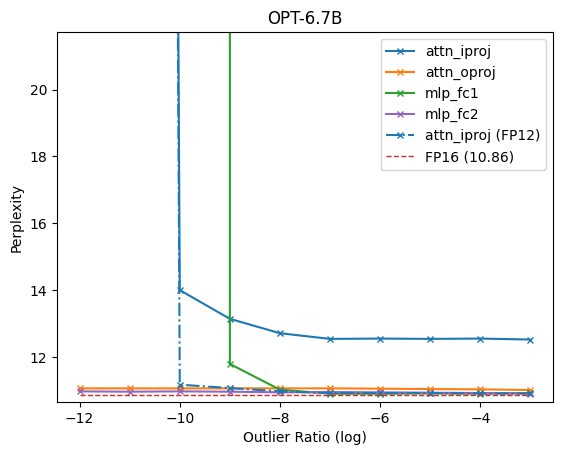

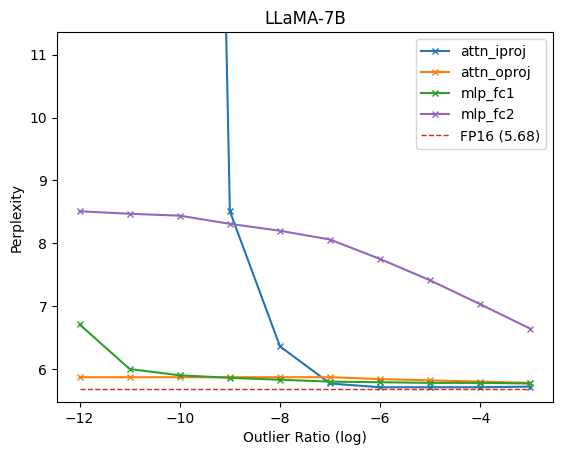

In [73]:
# First, we only plot 16 bits result to show the trend

layer_types = {
    'qkvproj': 'attn_iproj',
    'oproj': 'attn_oproj',
    'fc1': 'mlp_fc1',
    'fc2': 'mlp_fc2',
}
layer_type_colors = {
    layer_type: color for layer_type, color in zip(layer_types, ['C0', 'C1', 'C2', 'C4'])
}
outlier_precisions = [
    8,
    # 12,
    # 16,
]
models = {
    'opt-6.7b': 'OPT-6.7B',
    'llama-7b-meta': 'LLaMA-7B',
}
model_fp16_ppl = {
    'opt-6.7b': 10.86,
    'llama-7b-meta': 5.68,
}

for model in models:
    for layer_type in layer_types:
        for outlier_precision in outlier_precisions:
            df1 = df[df['layer_type'] == layer_type]
            df1 = df1[df1['outlier_precision'] == outlier_precision]
            df1 = df1[df1['model'] == model]
            # sort df1 by outlier ratio
            df1 = df1.sort_values(by=['outlier_ratio'])

            outlier_ratio_list = -1 * np.log2(df1['outlier_ratio'])
            ppl_list = df1['wikitext2']
            color = layer_type_colors[layer_type]

            plt.plot(outlier_ratio_list, ppl_list, 'x-', markersize=5, color=color, label=f'{layer_types[layer_type]}')

    # draw an extra line for opt qkvproj 12bit
    if model == 'opt-6.7b':
        df1 = df[df['layer_type'] == 'qkvproj']
        df1 = df1[df1['outlier_precision'] == 12]
        df1 = df1[df1['model'] == model]
        # sort df1 by outlier ratio
        df1 = df1.sort_values(by=['outlier_ratio'])

        outlier_ratio_list = -1 * np.log2(df1['outlier_ratio'])
        ppl_list = df1['wikitext2']
        color = layer_type_colors['qkvproj']

        plt.plot(outlier_ratio_list, ppl_list, 'x-.', markersize=5, color=color, label=f'{layer_types["qkvproj"]} (FP12)')

    # draw a horizontal line of model ppl
    fp16_ppl = model_fp16_ppl[model]
    plt.plot((-12, -3), [fp16_ppl, fp16_ppl], '--', linewidth=1, color='C3', label=f'FP16 ({fp16_ppl})')
    plt.ylim(fp16_ppl-0.2, 2*fp16_ppl)

    plt.xlabel('Outlier Ratio (log)')
    plt.ylabel('Perplexity')
    plt.title(f'{models[model]}')
    plt.legend(loc='upper right')

    plt.savefig(f'final_figs/outlier_dse_{models[model]}.pdf')
    plt.show()

In [ ]:
# then we plot detailed results at sweet spot